A notebook focused just on defining the isolation criteria from the large WvW complexes

Restarting here on 18 July 2018. Tried to skip straight to UCHVC isolation, but I'm not trusting the code I have for computing distances. So I will restart here, from the top. And look at old IDL code at the same time to compare.

Will also create uchvc_catalog.py where I can place code that I want to script and call w/in notebooks.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/adams/python')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import ascii
from astropy import coordinates as coord
from astropy import units as u
import alfalfa
import uchvcs
import uchvc_catalog as uc
from astropy.coordinates import SkyCoord

In [6]:
#Get the WvW catalog
wvw_cat = uc.get_wvw('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
wvw_cmplx_cat = uc.get_wvw('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt',complex=True)

print wvw_cat.colnames
print len(wvw_cat),len(wvw_cmplx_cat)

['ID', 'RA', 'Dec', 'l', 'b', 'cz', 'vlsr', 'vgsr', 'vlg', 'vdev', 'flux']
617 534


In [7]:
lg_colnames = ['Name', 'RAh','RAm','RAs','Decd','Decm','Decs','E(B-V)','(m-M)o','(m-M)o_err+','(m-M)o_err-',
           'vh','vh_err+','vh_err-','Vmag','Vmag_err+','Vmag_err-','PA','PA_err+','PA_err-',
           'e','e_err+','e_err-','muVo','muVo_err+','muVo_err-','rh','rh_err+','rh_err-',
           'sigma_s','sigma_s_err+','sigma_s_err-','vrot_s','vrot_s_err+','vrot_s_err-',
           'M_HI','sigma_g','sigma_g_err+','sigma_g_err-','vrot_g','vrot_g_err+','vrot_g_err-',
           '[Fe/H]','[Fe/H]_err+','[Fe/H]_err-','F','References']

np.sort(lg_colnames)
lg_colstarts =(0,18,21,24,29,33,36,39,45,51,56,62,68,73,78,83,87,91,97,102,107,112,117,122,127,131,135,142,
               148,154,159,164,169,174,179,184,189,194,199,204,210,215,220,226,231,236,238)

print len(lg_colstarts), len(lg_colnames)

47 47


In [8]:
#Get the LG catalog
#That means figure out how to read it in properly
lgfile = '/Users/adams/data/uchvcs/catalog/NearbyGalaxies_sep15.dat'

lgcat = uc.get_lg(lgfile)
print lgcat.colnames

['Names', 'RA', 'Dec', 'cz']


In [9]:
#Now would also like to isolate to sources within ALFALFA spring footprint
#Since that avoids MS, which may bias isolation criteria (it takes up a lot of sky!)

coord_lg = SkyCoord(lgcat['RA'],lgcat['Dec'],frame="icrs",unit="deg")
lg_spring_ind = uc.get_spring_indices(coord_lg)

lgcat_spring = lgcat[lg_spring_ind]

print len(lgcat),len(lgcat_spring)
#print lgcat_spring

132 19


For WvW complex sources: 0.928838951311 have complex NN at 20deg, 0.915721231767 have WvW cloud at 20deg
For all WvW clouds sources: 0.958801498127 have complex NN at 20deg, 0.920583468395 have WvW cloud at 20deg
For LG sources: 0.0149812734082 have complex NN at 20deg, 0.0129659643436 have WvW cloud at 20deg
For LG spring sources: 0.00374531835206 have complex NN at 20deg, 0.0032414910859 have WvW cloud at 20deg
For Nov 12 LG gals sources: 0.0112359550562 have complex NN at 20deg, 0.0097244732577 have WvW cloud at 20deg
[ 0.92883895  0.9588015   0.01498127  0.00374532  0.01123596]
[ 0.91572123  0.92058347  0.01296596  0.00324149  0.00972447]


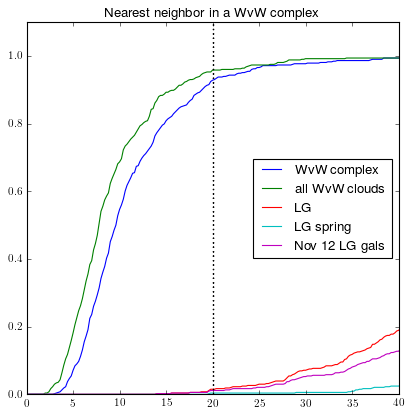

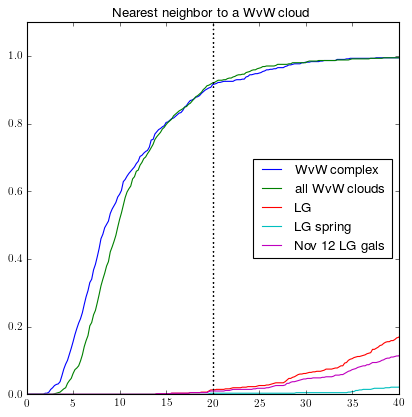

In [18]:
#Look at isolation from WvW complexes (and clouds)
#Can set two criteria:
#general based on full sky, stricter for spring ALFALFA sky (isolated from HVC structure)
#But maybe just stick with one criteria - best set for WvW complexes/clouds
#And may miss one or two LG galaxies, but that'st he price


coord_wvw = SkyCoord(wvw_cat['RA'],wvw_cat['Dec'],"icrs", unit="deg")
coord_wvw_cmplx = SkyCoord(wvw_cmplx_cat['RA'],wvw_cmplx_cat['Dec'],"icrs", unit="deg")

coord_lg_spring = SkyCoord(lgcat_spring['RA'],lgcat_spring['Dec'],frame="icrs",unit="deg")
labels=['WvW complex', 'all WvW clouds', 'LG', 'LG spring','Nov 12 LG gals']

#temporary LG test:
lg=ascii.read('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
lg_ra,lg_dec = alfalfa.get_radec('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
coord_LG = SkyCoord(lg_ra,lg_dec,frame="icrs", unit="deg")


fig,cf_cutoff_cmplx=uc.plot_Nth_neighbors(coord_wvw_cmplx,wvw_cmplx_cat['cz'],
                          coords2=[coord_wvw_cmplx,coord_wvw,coord_lg,
                                   coord_lg_spring,coord_LG],
                          vel2=[wvw_cmplx_cat['cz'],wvw_cat['cz'],lgcat['cz'],
                                lgcat_spring['cz'],lg['vh']],
                          labels=labels,
                          cutoff=20,f=0.5)


plt.title('Nearest neighbor in a WvW complex')

#for nearest neighbor in a WvW complex
plt.xlim(0,40)
plt.plot([20,20],[0,2],'k:')
#plt.plot([])

fig2,cf_cutoff_wvw=uc.plot_Nth_neighbors(coord_wvw,wvw_cat['cz'],
                          coords2=[coord_wvw_cmplx,coord_wvw,coord_lg,
                                   coord_lg_spring,coord_LG],
                          vel2=[wvw_cmplx_cat['cz'],wvw_cat['cz'],lgcat['cz'],
                                lgcat_spring['cz'],lg['vh']],
                          labels=labels,
                          cutoff=20,f=0.5)

plt.title('Nearest neighbor to a WvW cloud')
plt.xlim(0,40)
plt.plot([20,20],[0,2],'k:')


#also want to get values for my cutoff
#add that to code
for (lab,cmplx,wvw) in zip(labels,cf_cutoff_cmplx,cf_cutoff_wvw):
    print 'For {0} sources: {1} have complex NN at 20deg, {2} have WvW cloud at 20deg'.format(lab,cmplx,wvw)

print cf_cutoff_cmplx
print cf_cutoff_wvw


In [9]:
#Also want to get the exact numbers out for my cutoff!


In [8]:
#get candidates catalog
#note that spring candidate catalog is complete
#but for fall sky I will need to create the .csv file since I finished the grids last time I was at Cornell
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

print 'done with cands'

check got hiname
check got ra,dec
check got l,b
check got vels
done with cands


In [5]:

#and code9s for comparison:
code9s = ascii.read('/Users/adams/data/uchvcs/catalog/code9s_cat.txt')
print 'done with code 9s'

done with code 9s


In [6]:
print code9s.colnames

['AGC', 'HIname', 'RA', 'Dec', 'l', 'b', 'cz', 'vlsr', 'vgsr', 'vlg', 'vdev', 'w50', 'hsize', 'flux', 'SN', 'code']


In [7]:
#also want to get just spring code9s for comparison purposes
#ind1 = np.where( code9s['RA']<270 )
#ind2=np.where(code9s['RA']> 60)
ind=np.where((code9s['RA']<270) & (code9s['RA']> 60) )
spring_code9s = code9s[ind]

In [10]:
#also want WvW catalog
wvw=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
#and all LG gals
#print wvw
#plus LG gals in ALFALFA footprint
lg=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
print lg

#get spring only local also:
lg_spring=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_spring_positions_nov12.txt')


check got hiname
check got ra,dec
check got l,b
check got vels
check got hiname
check got ra,dec
check got l,b
check got vels
       AGC               HIname       ...         SN                 code       
------------------ ------------------ ... ------------------ -------------------
1.49166814624e-154 1.49166814624e-154 ... 1.49166814624e-154  1.49166814624e-154
-2.31584192755e+77 1.49166814624e-154 ... -1.72723381753e-77  1.49166814624e-154
    -139.185592329  2.2044977203e-314 ...                nan  1.82804288961e-322
     113.759167272 2.20449994755e-314 ... 2.20295126123e-314 -1.11080064707e-181
    -38.9363631247  2.2045000266e-314 ...                0.0  2.15530722248e-314
     150.704924524 2.20450006613e-314 ...  2.1228791171e-314  2.12463279323e-314
     52.9649706959 2.20450010565e-314 ... 4.94065645841e-324  -1.05252821915e-08
    -51.9378831501 2.20450014518e-314 ... 4.94065645841e-324  2.19594962377e-314
     21.3884850865  2.2045001847e-314 ... 3.45845952089e-323  1.

In [11]:
#now I want to check isolation from WvW catalog - here is where I will have strictest criterion.
#Will look only at spring sky
#i would like to be able to add a column to spring_cands that contains the distance to nearest WvW cloud using f=0.5 ()
#note that this is just using add_col_neigh_dist with Nth=1 (default, takes closets objects)
#print spring_cands

spring_cands_wvw = alfalfa.add_col_neigh_dist(spring_cands,wvw,name='WvW')

#print spring_cands_wvw

lg_wvw = alfalfa.add_col_neigh_dist(lg,wvw,name='WvW')

lg_spring_wvw = alfalfa.add_col_neigh_dist(lg_spring,wvw,name='WvW')

#get same for WvW catalog - want to know the typical linking scale there

wvw_dist = alfalfa.add_col_neigh_dist(wvw,wvw,Nth=2,name='dist_wvw')

print lg_spring_wvw

codes9s = alfalfa.add_col_neigh_dist(code9s,wvw,name='WvW')

spring_code9s=alfalfa.add_col_neigh_dist(spring_code9s,wvw,name='WvW')

#print lg_wvw

        AGC                HIname       ...        code             WvW     
------------------- ------------------- ... ------------------ -------------
 1.49166814624e-154  1.49166814624e-154 ... 1.49166814624e-154 42.5164740474
-3.10503637572e+231       2.00000012407 ... 1.49166814624e-154 28.3538523982
 2.96439387505e-323  2.20621379705e-314 ... 2.20744420232e-314 29.1585738292
                0.0  4.94065645841e-324 ...    -0.839315891266 25.1476807142
     -30.0738372803  2.20852137314e-314 ...                0.0  38.286607322
  1.15998411999e-28  2.20852137709e-314 ...                0.0 19.1141316563
 1.99270016953e+209   2.2085352465e-314 ...                0.0 48.1220519891
 1.44499267528e+214  2.17912015105e-314 ... 2.17912015105e-314 33.7628150755
 3.80985006741e+180  6.33886223614e-321 ...                1.0 45.2060538498
 4.71357970852e+257                 0.0 ...                0.0  19.796260463
      -94.033504841 -1.28822983327e-231 ... 1.49166814624e-154 18.8811561981

/Users/adams/python/alfalfa.py:355: RuntimeWarning: invalid value encountered in arccos
  np.cos(dec1)*np.cos(dec2)*np.cos((ra1-ra2)) )


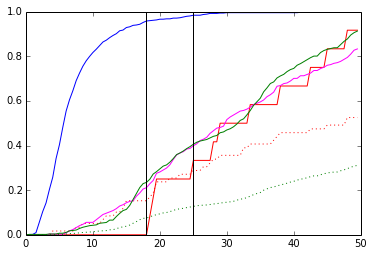

In [12]:
#sweet
#now I want to plot the distance to nearest WvW neighbor for these different pops
#will also want to separate spring sky LG gals
#want to do this as cumulative distribution function - is there an easy way to do this in matplotlib?
values_wvw, bins = np.histogram(wvw_dist['dist_wvw'], bins=100,range=(0,50))
n_wvw= float(len(wvw_dist['dist_wvw']))
cum_wvw = np.cumsum(values_wvw)

values_gals, bins = np.histogram(lg_wvw['WvW'], bins=100,range=(0,50))
cum_gals = np.cumsum(values_gals)/float(len(lg_wvw))

values_cands,bins = np.histogram(spring_cands_wvw['WvW'], bins=100,range=(0,50))
cum_cands = np.cumsum(values_cands)/float(len(spring_cands_wvw))

#get spring gals only:
values_spring_gals, bins = np.histogram(lg_spring_wvw['WvW'], bins=100,range=(0,50))
cum_spring_gals = np.cumsum(values_spring_gals)/float(len(lg_spring_wvw))
            
values_code9s,bins = np.histogram(code9s['WvW'], bins=100,range=(0,50))
cum_code9s = np.cumsum(values_code9s)/float(len(code9s))


values_spring_code9s,bins = np.histogram(spring_code9s['WvW'], bins=100,range=(0,50))
cum_spring_code9s = np.cumsum(values_spring_code9s)/float(len(spring_code9s))
    
# plot the cumulative function
plt.plot(bins[:-1], cum_wvw/n_wvw, c='blue')
plt.plot(bins[:-1],cum_gals,'r:')
plt.plot(bins[:-1],cum_spring_gals,'r')

plt.plot(bins[:-1],cum_cands,c='magenta')

plt.plot(bins[:-1],cum_code9s,'g:')
plt.plot(bins[:-1],cum_spring_code9s,'g')

plt.plot([25,25],[0,1],'k')
plt.plot([18,18],[0,1],'k')

In [ ]:
print 